# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*

**Estimated time:** 30 mins exercises + 10 mins discussion

## Chapter 4: Good coding practices

*An intermezzo.*

### Style

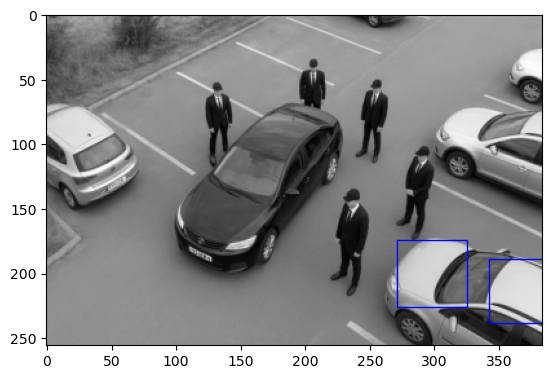

In [ ]:
# Some code
from tifffile import imread as r
from skimage.morphology import remove_small_objects as sa
from skimage.morphology import binary_opening as so
import skimage as sk
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

p = 'images/car/chatGPT_shadybusiness_zoomlow-8bit.tif'; q = r(p)

# trying some stuff
# triangle seems to work
x = np.percentile(q, 90); y = 2000
r=sa(so(sa(q>x, y),footprint=sk.morphology.disk(4)), 1000) # # morphology fixes all
x = sk.filters.threshold_triangle(q)
x = np.percentile(q, 10)

# nice! plot result!!
l, nl = ndimage.label(r)
plt.imshow(q, cmap='gray')
for rr in sk.measure.regionprops(l):
    minr, minc, maxr, maxc = rr.bbox
    rrr = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='blue', linewidth=1)
    plt.gca().add_patch(rrr)

### Exercise 1 (part A)

*Don't look at exercise part B yet, or ahead in the notebook. Spend only five minutes on part A and then move on with part B.*

The code above aims to segment bright (white/light grey in this picture) cars using a simple algorithm.

- Can you improve the code such that blue recteangles are detecting the other bright cars?
- Can you change the code such that it works to select black cars (in this case the one in the middle)?
- What is the strategy of this algorithm? Which image operations are used?

### Exercise 1 (part B)

*Actually, the code in the above example was not adhering to good coding practices. It did not have a clear structure, it was unclear what parts of the code did, parameter names were poorly chosen, it had some misleading comments, etc. Below, you see a cleaned-up version of the code.*

- Do you think the code below is easier to understand? Why?
    - Coding style is partially personal, but it is good to look at style guides or books, such as 
        - https://github.com/Droogans/unmaintainable-code
        - https://peps.python.org/pep-0008/
        - https://google.github.io/styleguide/pyguide.html
    - Such guides help standardize code, making it easier to read for everyone.
- In case you failed in part A of this exercise, can you now finish the exercises in part A, but using the code below? 

*Although the "bad" code above might seem like an extreme example, in my experience, it's surprisingly easy to end up with code on your computer that looks like this.*
    

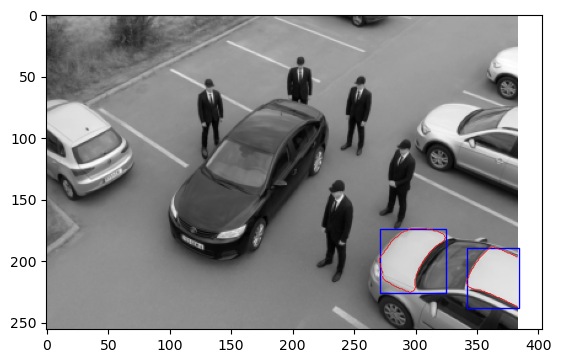

In [ ]:
# The code snippet below will segment bright cars in a car park image
#
# The general strategy is to use a threshold to create a binary image, 
# apply morphological opening and removal of small objects to get
# the desired mask. This mask is then used to get bounding boxes around 
# the cars.

import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np
import skimage as sk

# Load the image
img_path = 'images/car/chatGPT_shadybusiness_zoomlow-8bit.tif'
img_carpark = tiff.imread(img_path)

# Determine a bright threshold using the 90th percentile
thresh = np.percentile(img_carpark,90)

# Apply treshold
img_carpark_mask = img_carpark > thresh

# Improve the mask with morphological operations
# (The opening operation is intended to remove extrusions that are connected
# to more uniformily shaped areas.)
# Tuning parameters
MIN_SIZE1 = 2000; DISK_SIZE=4; MIN_SIZE2=1000 
# Execute operations
img_carpark_mask = sk.morphology.remove_small_objects(img_carpark_mask, min_size=MIN_SIZE1)
img_carpark_mask = sk.morphology.binary_opening(img_carpark_mask, footprint=sk.morphology.disk(DISK_SIZE))     
img_carpark_mask = sk.morphology.remove_small_objects(img_carpark_mask, min_size=MIN_SIZE2)

# Get the labeled mask and region properties
labeled_img, n_labels = sk.measure.label(img_carpark_mask, return_num=True)
img_mask_regions = sk.measure.regionprops(labeled_img)

# Plotting

# Function to plot a recteangle in a plot
def plot_rect(region):
    """Plot rectangle for the bounding box of a region."""
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='blue', linewidth=1)
    plt.gca().add_patch(rect)

# Actual plotting

# Original image
plt.imshow(img_carpark, cmap='gray')
# Mask
plt.contour(img_carpark_mask, colors='r', linewidths=0.5, levels=[0.5])
# Boxes
for region in img_mask_regions:
    plot_rect(region)

### Modularity

The following piece of code shows one strategy of determining both the GC content and reverse complement of multiple DNA strands.

In [ ]:
# (This example was partially created with ChatGPT; 
# https://chatgpt.com/share/68cab34e-0238-800e-a699-953cbae23960)

DNA_sequences = ["ATGCGTATAGCTAGCTAGGCTA", "CGCGCGCGCGCGAATCGCGATT", "ACGTACGACTACGTCAGCATCAG"]

gc_count_list = []
rev_comp_list = []
for sequence in DNA_sequences:

    # Count GC content
    gc_count = 0
    for base in sequence:
        if base in ["G", "C"]:
            gc_count += 1
    gc_content = gc_count / len(sequence)

    # Find reverse complement
    complement = {"A": "T", "T": "A", "G": "C", "C": "G"}
    rev_comp = ""
    for base in reversed(sequence):
        rev_comp += complement[base]
    
    # Store both
    gc_count_list.append(gc_content)
    rev_comp_list.append(rev_comp)

print('DNA_sequences =',DNA_sequences)
print('gc_count_list =',gc_count_list)
print('rev_comp_list =',rev_comp_list)

DNA_sequences = ['ATGCGTATAGCTAGCTAGGCTA', 'CGCGCGCGCGCGAATCGCGATT', 'ACGTACGACTACGTCAGCATCAG']
gc_count_list = [0.45454545454545453, 0.7272727272727273, 0.5217391304347826]
rev_comp_list = ['TAGCCTAGCTAGCTATACGCAT', 'AATCGCGATTCGCGCGCGCGCG', 'CTGATGCTGACGTAGTCGTACGT']


### Exercises

- Can you think of ways to improve this script to make it more readable and/or convenient to use?

This section is called "modularity". This means that when writing code, it is convenient to think about what functionalities you need, and how these can be broken up into smaller tasks. If you do this well, you can often recycle parts of your code. In addition, it helps to make the code more understandable, because chunks of code can be replaced by descriptive function names. Even if functions contain only one or a few lines of code, this can still help to make your code more readable and easy to re-use. Both for future you and other people that use your code.

- Can you rewrite the code above such that it uses functions in a useful way?

In larger collections of scripts, this practice becomes even more important. In that case, there might be functions that call other functions, and the structure becomes hierarchical. 

## Refactoring

Rewriting code to make it more readable and/or efficient, whilst maintaining the same functionality, is called "refactoring". Although it is (very very) tempting to just write code that works, it is often worth spending some time to refactor your code. This will save you time in the long run, because you (or others) will be able to understand and re-use your code more easily.

Please try this at home!